In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
from fn_PSHA_given_M_lambda import fn_PSHA_given_M_lambda
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
x = np.logspace(-3, np.log10(2), num=100)   # Considered IM values
T = 1   # 0.001 is the PGA case in the gmpe function
IM_label = 'Spectral Acceleration, SA(1s) [g]'
gmpeFlag = 1  # use BJF97

# seismicity parameters
rup = {}
rup["Fault_Type"] = 1  # 1 is strike slip
rup["Vs30"] = 500
rup["R"] = 10

x_example = 0.5 # example PGA value for table

# plotting parameters
figureAxisLimits = [0.05, 2, 1e-5, 1e-1]
figureXTickVals = [0.05, 0.1, 0.5, 1, 2]

In [3]:
# Point source with G-R magnitudes

# From Table 3.5, \label{tab:grExample_mMax}, fixed rate of M>5
lambda_M3 = [0.05, 0.0315, 0.01983, 0.01247, 0.007819, 0.004887, 0.003037, 0.00187, 0.001133, 0.0006685, 0.0003753, 0.0001904, 7.36e-05, 0, 0]
lambda_M2 = [0.05, 0.03152, 0.01986, 0.0125, 0.007858, 0.004929, 0.00308, 0.001914, 0.001179, 0.0007143, 0.0004214, 0.0002366, 0.00012, 4.64e-05, 0]
lambda_M1 = [0.05, 0.03153, 0.01988, 0.01252, 0.007882, 0.004955, 0.003108, 0.001942, 0.001207, 0.0007432, 0.0004505, 0.0002657, 0.0001492,7.57e-05, 2.93e-05]
lambda_M = [lambda_M1, lambda_M2, lambda_M3]
M_vals = [5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9]
M_max = [8, 7.8, 7.6]

# loop over cases
lambda0 = [None] * len(M_max)
example_output = [None] * len(M_max)
for i in range(len(M_max)):
    lambda0[i], example_output[i], disagg = fn_PSHA_given_M_lambda(np.array(lambda_M[i]), M_vals, T, x, x_example, rup, gmpeFlag)


[Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

<Figure size 432x288 with 0 Axes>

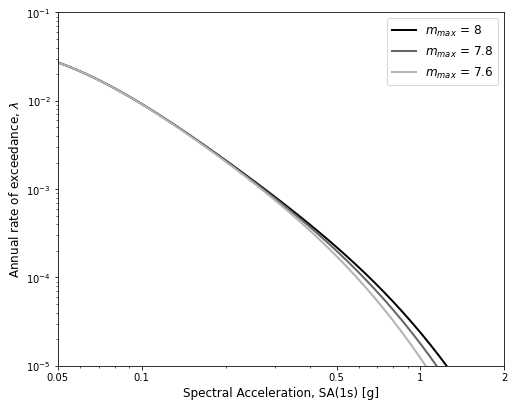

In [4]:
# Plot Fig 6.11
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda0[0]["x"], '-k', linewidth=2, label='$m_{max}$ = 8')
ax.loglog(x, lambda0[1]["x"], linewidth=2, linestyle='-', color = [0.4, 0.4, 0.4], label='$m_{max}$ = 7.8')
ax.loglog(x, lambda0[2]["x"], linewidth=2, linestyle='-', color = [0.7, 0.7, 0.7], label='$m_{max}$ = 7.6')

ax.set_xlabel(IM_label, fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(figureAxisLimits[2], figureAxisLimits[3])
ax.set_xlim(figureAxisLimits[0], figureAxisLimits[1])
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)
